# Movie Studio Analysis
### Phase 2 - Data Science Project

### **Introduction**
This project aims to analyze movie data to uncover key trends and provide actionable insights for a new movie studio. The insights will help stakeholders make data-driven decisions about the types of films to produce, how to allocate production budgets effectively, and strategies to boost international market success.

**Key Business Questions**

To guide the analysis and deliver meaningful recommendations, we address the following core questions:

1. Which types of movies perform best in terms of profitability?

2. How do production budgets relate to revenue?

3. What strategies can improve movie performance in international markets?

**Approach and Impact**

Using historical data from three sources, including IMDb, Movie_gross and Movie_budget we conducted exploratory data analysis to identify patterns in movie genres, budget allocations, and revenue performance. By answering the key questions, this project provides evidence-based recommendations for movie production strategy, budget management, and market positioning to enhance the studio’s competitiveness and profitability.

### Business Understanding
This project addresses a real-world problem faced by a new movie studio entering the competitive film production industry. The challenge for the studio is to identify the types of movies that perform best at the box office, determine how production budgets relate to revenue, and develop strategies for international market success.

**Stakeholders**

The primary stakeholders are the decision-makers and executives of the new movie studio, who need actionable insights to guide production decisions. By understanding profitability, revenue trends, and audience preferences, they can allocate resources effectively, choose the right types of movies to produce, and maximize return on investment.

**Value of the Project**

This project provides valuable insights into:
1. Identifying movie types that deliver the highest profitability.
2. Understanding the relationship between production budgets and revenue.
3. Developing strategies to enhance international market performance.

The findings will empower stakeholders to make informed decisions, ensuring the studio's success in a highly competitive industry.

**Implications of the Project**

This project will provide a data-driven foundation for strategic decisions in movie production. By leveraging historical performance data, the studio can reduce financial risks, maximize returns on investment, and differentiate itself in a competitive market. It will also enhance the studio's ability to compete with established players by focusing on well-performing content tailored to global audiences

### Data Understanding
This project uses data from six primary sources:

1. **tn.movie_budgets.csv.gz**: Contains data on production budgets, domestic gross, and worldwide gross for movies, which is critical for analyzing profitability and revenue trends.
   - **Key Features**: `production_budget`, `domestic_gross`, `worldwide_gross`.

2. **bom.movie_gross.csv.gz**: Includes additional data on domestic and foreign gross revenues by year, providing insights into international market performance.
   - **Key Features**: `domestic_gross`, `foreign_gross`, `year`.

3. **rt.movie_info.tsv.gz**: Provides detailed metadata about movies, including genres, synopses, and box office data.
   - **Key Features**: `synopsis`, `genre`, `box_office`.

4. **rt.reviews.tsv.gz**: Audience and critic reviews that provide qualitative feedback and ratings for movies.
   - **Key Features**: `review`, `rating`, `critic`, `publisher`.

5. **im.db**: An SQLite database from IMDb, offering details on movie genres, ratings, and metadata, which helps analyze audience preferences, crew performance, and genre-based trends.
   - **Key Features**: `genres`, `averagerating`, `primary_title`.

6. **tmdb.movies.csv**: Metadata about movies from TMDB, including popularity, genres, and vote averages, which can be used to analyze audience preferences.
   - **Key Features**: `popularity`, `vote_average`, `genre_ids`.

Dataset Properties:
- Each dataset was cleaned and processed to ensure consistency and relevance for the analysis. Specific transformations include:
  - Removing special characters and converting numeric columns.
  - Handling missing values to avoid bias in the analysis.
  - Combining datasets for holistic insights into movie performance.


**Relevance**

These datasets provide comprehensive coverage of key factors influencing movie performance, including financial, audience, and market dimensions.

The merged dataset enables a holistic analysis of the relationships between budgets, revenues, profitability, and audience preferences.

**Limitations**
1. Potential missing or incomplete data in revenue and budget fields, which could affect the analysis.

2. Genre categorization may overlap, requiring careful handling during analysis.

### **Data Description**

In our data analysis process, the data description phase plays a pivotal role in building a thorough understanding of our dataset. This step enables us to summarize and explore the dataset's key characteristics, uncover patterns, identify anomalies, and lay the groundwork for deeper analysis. By documenting the data comprehensively, we ensure that stakeholders and team members can interpret the insights we derive accurately and meaningfully.

**Key Aspects of Our Data Description**

***1. Dataset Overview:***

We start by introducing our dataset, detailing its source, purpose, and scope.
We explain the context in which the data was collected or generated, helping to align our analysis with its intended use.

***2. Structure of the Dataset:***

Our focus includes summarizing the dataset's structure, such as the number of rows and columns.
If our data consists of multiple tables, we describe their relationships and provide an overview of their connections.

***3. Key Features (Columns):***

Each column in our dataset is described in detail, including its meaning, units, and relevance to our analysis.
We highlight columns that are central to achieving our analytical objectives.

***4. Data Types:***

We identify and document the data types for each column, such as numeric, categorical, textual, or date/time.
Where necessary, we ensure the data types align with their intended analytical use.

***5. Statistical Summaries:***

For numerical columns, we provide descriptive statistics, including measures like mean, median, standard deviation, and range.
For categorical columns, we present frequency counts and distributions to understand their composition.

***6. Missing Data:***

We assess and document any missing values in our dataset.
Strategies to handle missing data are outlined, ensuring the integrity of our analysis.

***7. Data Quality and Integrity:***

Our review includes insights into the dataset's completeness, accuracy, and consistency.
We identify any outliers or inconsistencies that may affect our analysis.

***8. Data Transformations (if any):***

We document any pre-processing or transformations applied to the dataset.
Details of derived or computed columns are provided to ensure transparency.

#### Purpose of Our Data Description
The purpose of this phase is to equip us with a comprehensive understanding of our dataset, enabling us to conduct informed and accurate analysis. By identifying limitations and key patterns early on, we reduce the risk of misinterpretation and biases. Furthermore, a well-documented data description ensures effective communication of findings, making it easier to engage both technical and non-technical team members in our project.

#### 1. Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 2. Connecting to the database

In [2]:
# Load SQLite database
conn = sqlite3.connect("./im.db")
cursor = conn.cursor()

#### 3. Specifying the file paths

In [3]:
# File paths
file_paths = {
    'tn_movie_budgets': './tn.movie_budgets.csv',
    'tmdb_movies': './tmdb.movies.csv',
    'rt_reviews': './rt.reviews.tsv',
    'rt_movie_info': './rt.movie_info.tsv',
    'bom_movie_gross': './bom.movie_gross.csv',
    'im_db': './im.db'
}

# Load SQLite database
conn = sqlite3.connect(file_paths['im_db'])

In [4]:
# List tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Display the tables
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [5]:
# List of all tables in the database
tables = ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']

# Loop through each table and display its columns
for table in tables:
    print(f"Columns in table '{table}':")
    cursor.execute(f"PRAGMA table_info({table});")
    columns = cursor.fetchall()
    
    # Display the column names
    for column in columns:
        print(column[1])  # column[1] contains the column name
    print("\n")  # Print a blank line between tables for readability

Columns in table 'movie_basics':
movie_id
primary_title
original_title
start_year
runtime_minutes
genres


Columns in table 'directors':
movie_id
person_id


Columns in table 'known_for':
person_id
movie_id


Columns in table 'movie_akas':
movie_id
ordering
title
region
language
types
attributes
is_original_title


Columns in table 'movie_ratings':
movie_id
averagerating
numvotes


Columns in table 'persons':
person_id
primary_name
birth_year
death_year
primary_profession


Columns in table 'principals':
movie_id
ordering
person_id
category
job
characters


Columns in table 'writers':
movie_id
person_id




#### 4.  Displaying the files structure

In [6]:
df=pd.read_csv("tmdb.movies.csv")
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
df1=pd.read_csv("tn.movie_budgets.csv")
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [8]:
df2 = pd.read_csv("rt.reviews.tsv", sep='\t', encoding='latin-1')
df2


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [9]:
df3 = pd.read_csv("rt.movie_info.tsv", sep='\t', encoding='latin-1')
df3


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [10]:
df4=pd.read_csv("bom.movie_gross.csv")
df4

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### **Exploratory Data Analysis (EDA)**

**1. Movies that performed in terms of profitability**


In this analysis, we focus on exploring the profitability of movies to identify trends, patterns, and factors that contribute to their financial success. By examining key metrics such as production budgets, worldwide gross revenue, and profitability, we aim to uncover insights into which movies have performed exceptionally well financially and why.

Our primary goal is to determine the most profitable movies and explore how aspects such as genres, directors, writers, and studios influence profitability. Additionally, we aim to provide actionable insights for stakeholders in the film industry by highlighting the characteristics of high-performing movies.

This analysis not only ranks movies based on profitability but also delves into visualizing trends, identifying the top-performing contributors, and understanding the factors that drive success in the highly competitive movie industry. Through this, we aim to deliver a comprehensive understanding of what makes a movie financially successful.

In [11]:
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


**Data Cleaning**

In [12]:
# Clean the columns by removing $ and commas, then convert them to float
df1['production_budget'] = df1['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df1['domestic_gross'] = df1['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df1['worldwide_gross'] = df1['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the profitability
df1['Profitability'] = df1['worldwide_gross'] - df1['production_budget']

# Display the first few rows to check the result
df1.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [13]:
df1['profitability'] = df1['worldwide_gross'] - df1['production_budget']


In [14]:
# Sort the DataFrame by the 'profitability' column in descending order
df1_sorted = df1.sort_values(by='Profitability', ascending=False)

# Display the sorted DataFrame
df1_sorted.head()  # Shows the top 5 rows, you can adjust as needed


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability,profitability
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,1.433855e+09


#### Visualization

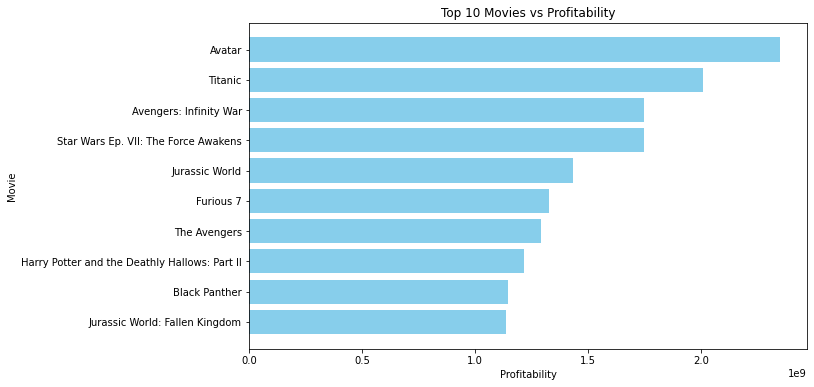

In [15]:
# Sort the DataFrame by the 'Profitability' column in descending order
df1_sorted = df1.sort_values(by='Profitability', ascending=False)

# Plot a horizontal bar chart for the top 10 movies
plt.figure(figsize=(10, 6))
plt.barh(df1_sorted['movie'].head(10), df1_sorted['Profitability'].head(10), color='skyblue')
plt.xlabel('Profitability')
plt.ylabel('Movie')
plt.title('Top 10 Movies vs Profitability')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest profitability on top
plt.show()


**Insights**

From the visualization:

1. Top Performers: Movies such as Avatar, Titanic, and Avengers: Infinity War lead in profitability, generating billions in net earnings.

2. Common Traits: These films belong to well-known franchises or have groundbreaking visuals, strong global appeal, and mass marketing efforts.

3. Franchise Impact: Franchise-based movies (Star Wars, Avengers, Harry Potter, etc.) dominate profitability, highlighting the power of pre-established fan bases and sequels.

**2. Relationship of Production Budget on Revenue**

In this analysis, we examine the relationship between a movie's production budget and its revenue to understand how investment levels impact financial performance. By exploring this relationship, we aim to determine whether higher production budgets consistently lead to higher revenues or if other factors play a significant role in a movie's success.

Our analysis focuses on both domestic and worldwide revenue, providing insights into how production budgets correlate with different revenue streams. We also investigate potential diminishing returns, where increased spending might not proportionally translate into higher earnings.

This study helps identify trends and patterns in budget allocation and revenue generation, offering valuable insights for filmmakers, producers, and industry stakeholders in optimizing their investments for maximum profitability. Through this analysis, we aim to provide a clearer picture of how production budgets influence a movie's financial outcome.

#### Visualizations

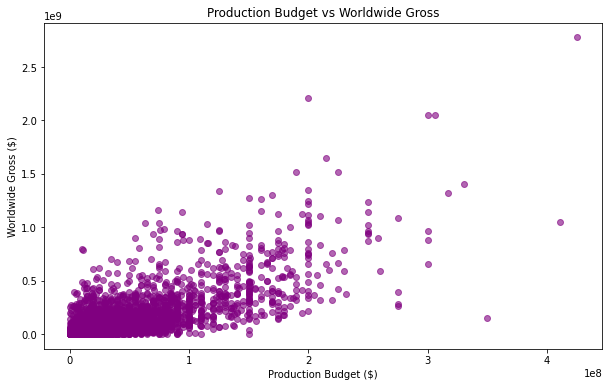

In [26]:
# Create a scatter plot comparing production_budget and worldwide_gross
plt.figure(figsize=(10, 6))
plt.scatter(df1['production_budget'], df1['worldwide_gross'], color='purple', alpha=0.6)

# Label the axes and give the plot a title
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Production Budget vs Worldwide Gross')

# Show the plot
plt.show()


**Insights**

1. Positive Trend with Variability: The scatter plot confirms a positive trend, with worldwide gross increasing as production budgets rise. However, there’s considerable variability, especially for mid-range and high-budget films, with some underperforming despite high budgets.
2. Outliers in Performance: A few films achieve exceptional gross revenue (above $2 billion), highlighting the potential for blockbuster success but also underscoring the risk of high-budget projects failing to perform.


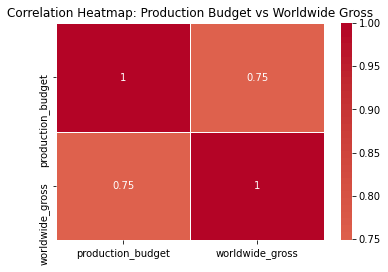

In [17]:

# Create a DataFrame with the selected columns
data = df1[['production_budget', 'worldwide_gross']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Correlation Heatmap: Production Budget vs Worldwide Gross')
plt.show()



**Insights**

1. Strong Positive Correlation: The correlation coefficient of 0.75 between production budgets and worldwide gross indicates a strong positive relationship. Movies with higher production budgets generally tend to generate higher worldwide revenue.
2. Significant Dependency: While production budget plays a significant role in determining gross revenue, other factors (e.g., marketing, genre, release timing) could also influence this outcome, as the correlation is not perfect.

**3. Strategies for increasing Revenue in international market**

In this analysis, we focus on identifying strategies to increase revenue in the international market by examining key factors that contribute to movie success. Specifically, we analyze:

**(i) Genres Based on Profitability:**  

    Identifying genres that generate the highest profitability to understand their global appeal.

**(ii) Directors Based on Profitability:**  

    Highlighting the top-performing directors whose work resonates with international audiences.

**(iii) Writers Based on Profitability:** 

    Analyzing writers who create stories that capture the interest of diverse viewers.

**(iv) Top 10 Studios Based on Average Profitability:**  

    Recognizing studios that consistently produce profitable movies, revealing best practices in production and marketing.

**(v) Top 10 Movies by Number of Votes and Average Rating:**  

    Exploring popular movies with strong audience engagement and critical acclaim.

**(vi) Top 10 Roles (Actors, Directors, Writers) in Movies:**  

    Evaluating key contributors to movie success and their impact on international revenue.

By focusing on these aspects, we aim to provide targeted insights for optimizing movie production, storytelling, and marketing strategies to maximize profitability in the international market.

**Merging Data**

We will merge df1 and df3 that have relevant columns for our analysis.

In [18]:
# Perform an outer join based on the index of both DataFrames
df_joined = pd.merge(df1, df3, left_index=True, right_index=True, how='outer')

# Display the result of the outer join
df_joined.head()


,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability,profitability,id_y,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2.351345e+09,1.0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,6.350639e+08,3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-2.002376e+08,5.0,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,1.072414e+09,6.0,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,9.997217e+08,7.0,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


#### **a. Genre based on profitability**

In [19]:
# Rank the movies based on profitability (highest to lowest)
df_joined['Rank'] = df_joined['Profitability'].rank(ascending=False, method='dense')

# Sort the DataFrame based on the 'Rank' column
df_joined_sorted = df_joined.sort_values(by='Rank')

# Display the top 10 movies based on profitability
df_joined_sorted.head(10)


,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profitability,profitability,id_y,synopsis,...,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,Rank
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2.351345e+09,1.0,"This gritty, fast-paced, and innovative police...",...,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1.0
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,2.008208e+09,55.0,A progressive scientist builds a machine that ...,...,Action and Adventure|Science Fiction and Fantasy,Henning Schellerup,NaN,NaN,NaN,NaN,NaN,99 minutes,NaN,2.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,1.748134e+09,10.0,Some cast and crew from NBC's highly acclaimed...,...,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,3.0
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,1.747311e+09,8.0,The year is 1942. As the Allies unite overseas...,...,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,4.0
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,1.433855e+09,45.0,Hawaiian surfer dudes Stew (Steve Van Wormer) ...,...,Comedy|Kids and Family,Steve Boyum,Jim Herzfeld|Dale Pollock,NaN,NaN,NaN,NaN,92 minutes,NaN,5.0
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,1.328723e+09,84.0,Despite excellent camerawork and smooth contin...,...,Drama,NaN,NaN,NaN,NaN,NaN,NaN,186 minutes,NaN,6.0
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,1.292936e+09,38.0,You'd think they would know better from their ...,...,Art House and International|Classics|Horror|My...,Roy Ward Baker,Anthony Hinds|John Elder,"Dec 23, 1970","Aug 7, 2001",NaN,NaN,96 minutes,NaN,7.0
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09,1.216693e+09,338.0,"""Hereafter"" tells the story of three people wh...",...,Drama|Mystery and Suspense,Clint Eastwood,Peter Morgan,"Oct 22, 2010","Mar 15, 2011",$,"32,741,596",126 minutes,Warner Bros. Pictures,8.0
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,1.148258e+09,54.0,Journalist Jep Gambardella (the dazzling Toni ...,...,Comedy|Drama,Paolo Sorrentino,Paolo Sorrentino|Umberto Contarello,"Nov 15, 2013","Mar 25, 2014",NaN,NaN,142 minutes,Janus Films,9.0
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09,1.135773e+09,145.0,"In this macabre farce, a baggage switch at a b...",...,Comedy,Tom Schulman,Tom Schulman,"Apr 18, 1997","Oct 8, 2002",NaN,NaN,95 minutes,NaN,10.0


#### Visualization

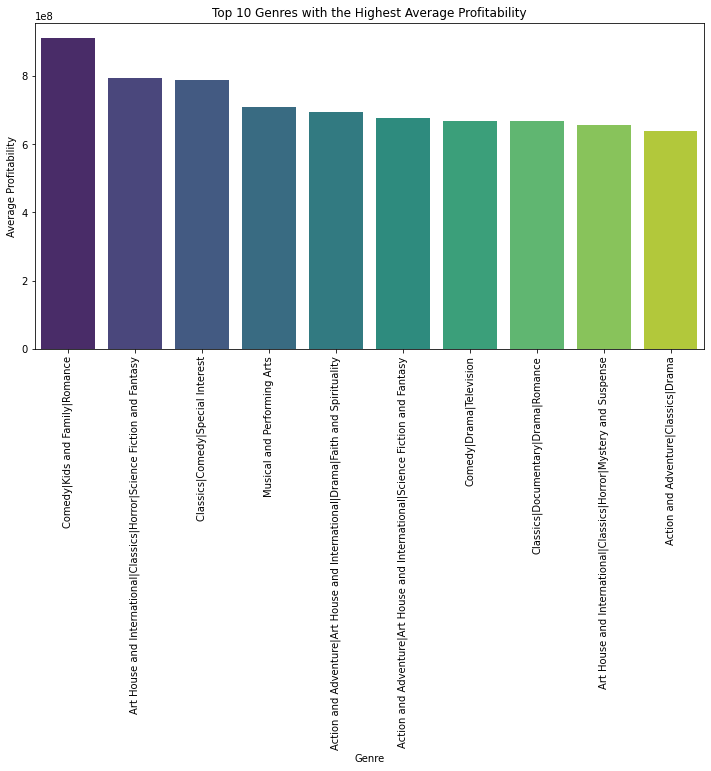

In [20]:

# Calculate the average profitability per genre
genre_profitability = df_joined.groupby('genre')['Profitability'].mean().sort_values(ascending=False)

# Get the top 10 genres with the highest average profitability
top_10_genres = genre_profitability.head(10)

# Create a bar plot to visualize the top 10 genres with the highest profitability
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='viridis')

# Title and labels
plt.title('Top 10 Genres with the Highest Average Profitability')
plt.xlabel('Genre')
plt.ylabel('Average Profitability')

# Rotate the genre labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()



**Insights**

1. Genres like Comedy/Family/Romance and Art House and International/Classic rank highest in profitability, suggesting strong global appeal.

2. High-performing genres include those catering to universal themes like Fantasy, Science Fiction, and Drama, which resonate with diverse audiences.

#### **b. Directors based on profitability**

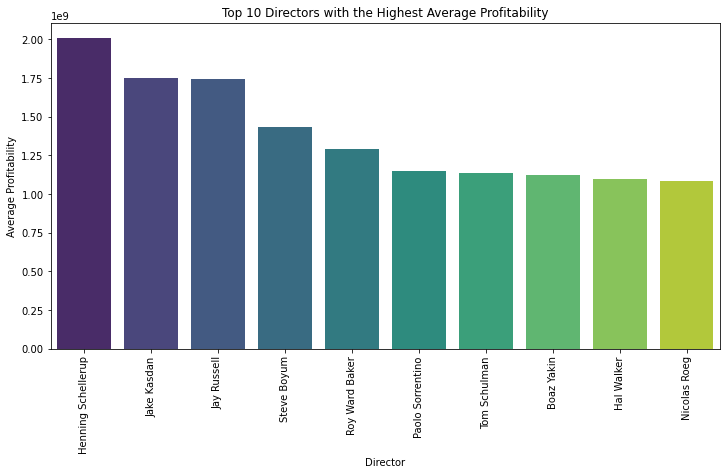

In [21]:
# Calculate the average profitability per director
director_profitability = df_joined.groupby('director')['Profitability'].mean().sort_values(ascending=False)

# Get the top 10 directors with the highest average profitability
top_10_directors = director_profitability.head(10)

# Create a bar plot to visualize the top 10 directors with the highest profitability
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='viridis')

# Title and labels
plt.title('Top 10 Directors with the Highest Average Profitability')
plt.xlabel('Director')
plt.ylabel('Average Profitability')

# Rotate the director labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


**Insights**

1. Directors like Henning Schellerup, Jake Kasdan, and Jay Russell lead in profitability, indicating their ability to deliver successful movies.
2. Consistent profitability suggests strong decision-making in casting, budgeting, and storytelling.


#### **c. Writers based on profitability**


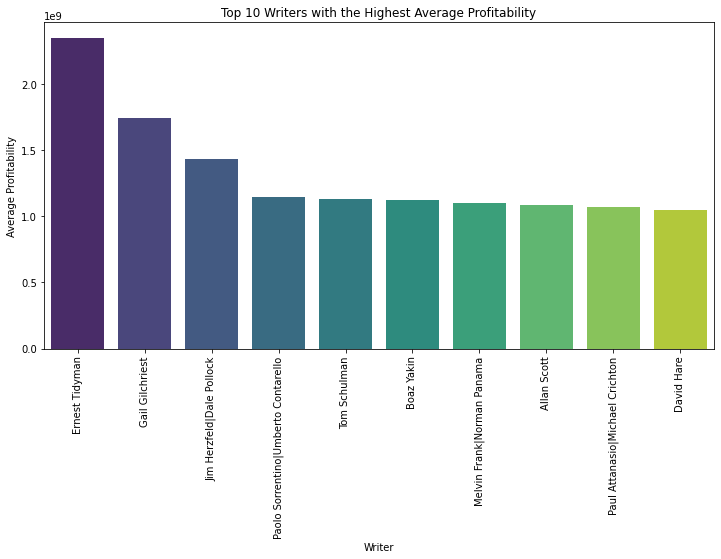

In [22]:
# Calculate the average profitability per writer
writer_profitability = df_joined.groupby('writer')['Profitability'].mean().sort_values(ascending=False)

# Get the top 10 writers with the highest average profitability
top_10_writers = writer_profitability.head(10)

# Create a bar plot to visualize the top 10 writers with the highest profitability
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_writers.index, y=top_10_writers.values, palette='viridis')

# Title and labels
plt.title('Top 10 Writers with the Highest Average Profitability')
plt.xlabel('Writer')
plt.ylabel('Average Profitability')

# Rotate the writer labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


**Insights**

1. Writers like Ernest Tidyman and Gail Gilchriest contribute to highly profitable movies, showcasing their skill in crafting compelling stories.
2. Consistency across multiple writers suggests the value of collaboration and narrative innovation.


#### **d. Top 10 studios based on average profitability**


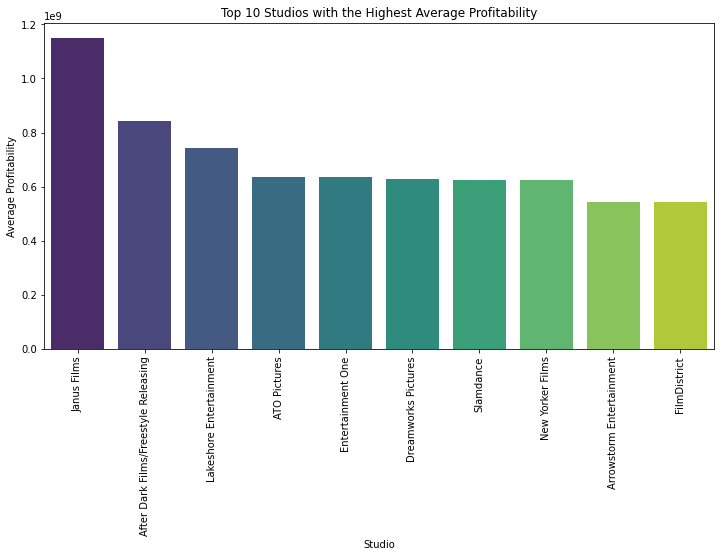

In [23]:
# Drop rows where 'studio' column is blank or NaN
df_joined = df_joined.dropna(subset=['studio'])

# Calculate the average profitability per studio
studio_profitability = df_joined.groupby('studio')['Profitability'].mean().sort_values(ascending=False)

# Get the top 10 studios with the highest average profitability
top_10_studios = studio_profitability.head(10)

# Create a bar plot to visualize the top 10 studios with the highest profitability
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_studios.index, y=top_10_studios.values, palette='viridis')

# Title and labels
plt.title('Top 10 Studios with the Highest Average Profitability')
plt.xlabel('Studio')
plt.ylabel('Average Profitability')

# Rotate the studio labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


**Insights**

1. Studios such as Janus Films and After Dark Films show exceptional profitability, reflecting effective production and marketing strategies.
2. Mid-tier studios with consistent profitability suggest scalability and targeted audience strategies.



#### **e. Top 10 Movies by Number of Votes and Average Rating**


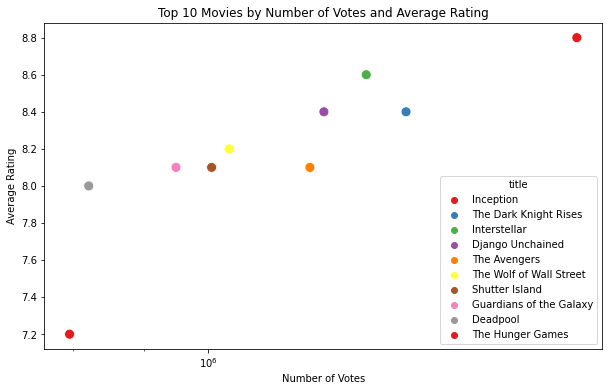

In [24]:
# SQL query to retrieve top 10 movies based on number of votes (ordered by numvotes)
query_votes_ratings = """
SELECT mr.numvotes, mr.averagerating, mb.primary_title AS title
FROM movie_ratings mr
JOIN movie_basics mb ON mr.movie_id = mb.movie_id
WHERE mr.numvotes > 0
ORDER BY mr.numvotes DESC
LIMIT 10
"""

# Execute the query and load the result into a pandas DataFrame
df_votes_ratings = pd.read_sql_query(query_votes_ratings, conn)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numvotes', y='averagerating', data=df_votes_ratings, hue='title', palette='Set1', s=100)
plt.title('Top 10 Movies by Number of Votes and Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.xscale('log')  # Log scale for better visualization
plt.yscale('linear')
plt.show()


**Insights**

1. Popular movies such as Inception, The Dark Knight Rises, and Interstellar have both high ratings and substantial audience votes.
2. The correlation between high IMDb ratings and a large number of votes indicates strong audience engagement.


#### **f. Top 10 Roles (Actors, Directors, Writers) in Movies**

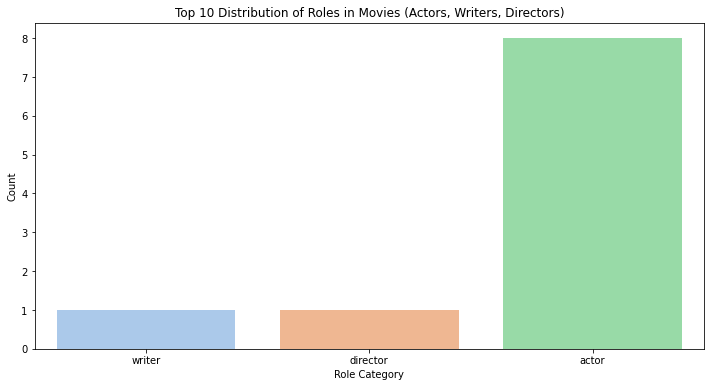

In [25]:
# SQL query to get a list of all persons and their roles, limited to top 10 categories
query_person_roles = """
SELECT p.primary_name, pr.category, pr.job
FROM principals pr
JOIN persons p ON pr.person_id = p.person_id
WHERE pr.category IN ('actor', 'writer', 'director')
ORDER BY p.primary_name
LIMIT 10
"""

# Execute the query and load the result into a pandas DataFrame
df_person_roles = pd.read_sql_query(query_person_roles, conn)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df_person_roles, palette='pastel')
plt.title('Top 10 Distribution of Roles in Movies (Actors, Writers, Directors)')
plt.xlabel('Role Category')
plt.ylabel('Count')
plt.show()

**Insights**

1. Actors dominate the distribution of roles, indicating their pivotal role in movie success.
2. Directors and writers, while fewer in number, significantly influence profitability through storytelling and creative decisions.



## **Recommendations**

1. Invest in franchise-based movies with universal themes, strong visuals, and global marketing to maximize profitability.
2. Prioritize strategic investment in high-budget films supported by robust market analysis and diversify production portfolios to balance risk and maximize profitability.
3. Focus on high-performing genres like Comedy, Family, and Fantasy, and collaborate with proven directors and writers to produce globally appealing movies. Benchmark successful studios for effective production and marketing strategies, while leveraging internationally recognized actors to maximize audience engagement and profitability.


## **Conclusion**

This analysis has shown that **franchise-based movies,** particularly in **high-performing genres** such as Comedy, Family, and Fantasy, are most successful in delivering strong profitability and broad international appeal. **While larger production budgets** are often linked to higher worldwide gross, some high-budget films still underperform, underscoring the importance of well-researched market strategies and effective execution.

Furthermore, **successful crew collaboration** plays a decisive role: proven directors and writers infuse compelling narratives, while recognized actors draw significant audience attention. **Benchmarking top studios** provides vital lessons in robust marketing and distribution methods that allow franchises like Star Wars and Marvel to thrive across diverse markets.

To maximize performance in international markets, production teams should:

1. Invest strategically in major franchises and universal themes, ensuring a balanced portfolio to mitigate risk.
2. Adopt strong global marketing campaigns, including localization efforts that resonate with regional audiences.
3. Prioritize narrative quality by enlisting top talent and aligning content with audience interests.

By combining budget optimization, thorough market analysis, targeted marketing, and high-quality storytelling, studios can significantly enhance their ability to reach global audiences and sustain profitability.
